In [107]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from warnings import filterwarnings
filterwarnings(action='ignore')

In [30]:
zomato=pd.read_csv('zomato.csv')

In [31]:
zomato

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml郾 Gurme,208,哿stanbul,"Kemanke侓 Karamustafa Pa侓a Mahallesi, R郾ht郾m Ca...",Karak韄y,"Karak韄y, 哿stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A埕ac郾,208,哿stanbul,"Ko侓uyolu Mahallesi, Muhittin 盱st韄nda埕 Caddesi,...",Ko侓uyolu,"Ko侓uyolu, 哿stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,哿stanbul,"Kuru韄e侓me Mahallesi, Muallim Naci Caddesi, No ...",Kuru韄e侓me,"Kuru韄e侓me, 哿stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A侓侓k Kahve,208,哿stanbul,"Kuru韄e侓me Mahallesi, Muallim Naci Caddesi, No ...",Kuru韄e侓me,"Kuru韄e侓me, 哿stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [32]:
country=pd.read_csv('Country-Code.csv')

In [33]:
country

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


# Explanatory Data Analysis

In [34]:
Zmt=pd.merge(zomato,country)

In [35]:
Zmt.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [36]:
Zmt.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
9546,5915730,Naml郾 Gurme,208,哿stanbul,"Kemanke侓 Karamustafa Pa侓a Mahallesi, R郾ht郾m Ca...",Karak韄y,"Karak韄y, 哿stanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz A埕ac郾,208,哿stanbul,"Ko侓uyolu Mahallesi, Muhittin 盱st韄nda埕 Caddesi,...",Ko侓uyolu,"Ko侓uyolu, 哿stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,哿stanbul,"Kuru韄e侓me Mahallesi, Muallim Naci Caddesi, No ...",Kuru韄e侓me,"Kuru韄e侓me, 哿stanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,A侓侓k Kahve,208,哿stanbul,"Kuru韄e侓me Mahallesi, Muallim Naci Caddesi, No ...",Kuru韄e侓me,"Kuru韄e侓me, 哿stanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey
9550,5927402,Walter's Coffee Roastery,208,哿stanbul,"Cafea埕a Mahallesi, Bademalt郾 Sokak, No 21/B, K...",Moda,"Moda, 哿stanbul",29.026016,40.984776,Cafe,...,No,No,No,No,2,4.0,Green,Very Good,591,Turkey


In [37]:
Zmt.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [38]:
Zmt.keys()

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [39]:
Zmt.info

<bound method DataFrame.info of       Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml郾 Gurme           208          哿stanbul   
9547        5908749               Ceviz A埕ac郾           208          哿stanbul   
9548        5915807                     Huqqa           208          哿stanbul   
9549        5916112                A侓侓k Kahve           208          哿stanbul   
9550        5927402  Walter's Coffee Roastery           208          哿stanbul

In [40]:
#finding null values
Zmt.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [52]:
Zmt['Rating color'].value_counts()

2    3737
4    2148
5    2100
1    1079
0     301
3     186
Name: Rating color, dtype: int64

In [46]:
#filling null values
Zmt['Cuisines'].fillna(Zmt['Cuisines'].mode()[0],inplace=True)

In [47]:
Zmt.isna().sum()

Country Code            0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [41]:
#dropping the unnecessary columns
Zmt.drop(['Restaurant ID','Restaurant Name','Address','Locality Verbose','Locality','Currency','City','Switch to order menu','Has Online delivery','Has Table booking','Is delivering now'],axis=1,inplace=True)

In [55]:
from sklearn import preprocessing

In [56]:
#converting str values to integer using encoder
a=preprocessing.LabelEncoder()
Zmt['Cuisines']=a.fit_transform(Zmt['Cuisines'])

In [57]:
a=preprocessing.LabelEncoder()
Zmt['Country']=a.fit_transform(Zmt['Country'])

In [58]:
a=preprocessing.LabelEncoder()
Zmt['Rating text']=a.fit_transform(Zmt['Rating text'])

In [61]:
a=preprocessing.LabelEncoder()
Zmt['Rating color']=a.fit_transform(Zmt['Rating color'])

In [62]:
Zmt

,Country Code,Longitude,Latitude,Cuisines,Average Cost for two,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,162,121.027535,14.565443,920,1100,3,4.8,0,1,314,6
1,162,121.014101,14.553708,1111,1200,3,4.5,0,1,591,6
2,162,121.056831,14.581404,1671,4000,4,4.4,1,5,270,6
3,162,121.056475,14.585318,1126,1500,4,4.9,0,1,365,6
4,162,121.057508,14.584450,1122,1500,4,4.8,0,1,229,6
...,...,...,...,...,...,...,...,...,...,...,...
9546,208,28.977392,41.022793,1813,80,3,4.1,1,5,788,11
9547,208,29.041297,41.009847,1824,105,3,4.2,1,5,1034,11
9548,208,29.034640,41.055817,1110,170,4,3.7,5,2,661,11
9549,208,29.036019,41.057979,1657,120,4,4.0,1,5,901,11


# Statistical Summary

In [63]:
#correlation
Zmt.corr()

,Country Code,Longitude,Latitude,Cuisines,Average Cost for two,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
Country Code,1.000000,-0.698299,0.019792,-0.132902,0.043225,0.243327,0.282189,-0.187174,0.222685,0.154530,0.968700
Longitude,-0.698299,1.000000,0.043207,0.126197,0.045891,-0.078939,-0.116818,0.059979,-0.181466,-0.085101,-0.766221
Latitude,0.019792,0.043207,1.000000,0.038151,-0.111088,-0.166688,0.000516,0.042590,-0.129447,-0.022962,0.181299
Cuisines,-0.132902,0.126197,0.038151,1.000000,0.005831,-0.005350,-0.080331,-0.016228,-0.079979,-0.032719,-0.127955
Average Cost for two,0.043225,0.045891,-0.111088,0.005831,1.000000,0.075083,0.051792,-0.049970,0.031439,0.067783,-0.004034
Price range,0.243327,-0.078939,-0.166688,-0.005350,0.075083,1.000000,0.437944,-0.140468,0.164242,0.309444,0.178035
Aggregate rating,0.282189,-0.116818,0.000516,-0.080331,0.051792,0.437944,1.000000,-0.367054,-0.182662,0.313691,0.255591
Rating color,-0.187174,0.059979,0.042590,-0.016228,-0.049970,-0.140468,-0.367054,1.000000,0.163717,-0.169044,-0.155486
Rating text,0.222685,-0.181466,-0.129447,-0.079979,0.031439,0.164242,-0.182662,0.163717,1.000000,0.203969,0.203846
Votes,0.154530,-0.085101,-0.022962,-0.032719,0.067783,0.309444,0.313691,-0.169044,0.203969,1.000000,0.155161


In [64]:
Zmt.describe()

,Country Code,Longitude,Latitude,Cuisines,Average Cost for two,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,64.126574,25.854381,989.461732,1199.210763,1.804837,2.666370,2.952885,1.788713,156.909748,3.736781
std,56.750546,41.467058,11.007935,514.176108,16121.183073,0.905609,1.516378,1.493048,1.694637,430.169145,2.651963
min,1.000000,-157.948486,-41.330428,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,77.081343,28.478713,497.000000,250.000000,1.000000,2.500000,2.000000,0.000000,5.000000,3.000000
50%,1.000000,77.191964,28.570469,1127.000000,400.000000,2.000000,3.200000,2.000000,2.000000,31.000000,3.000000
75%,1.000000,77.282006,28.642758,1353.500000,700.000000,2.000000,3.700000,4.000000,3.000000,131.000000,3.000000
max,216.000000,174.832089,55.976980,1824.000000,800000.000000,4.000000,4.900000,5.000000,5.000000,10934.000000,14.000000


# Finding Skewness

In [65]:
Zmt.skew()

Country Code             3.043965
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.307425
Average Cost for two    35.477915
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
Country                  3.312721
dtype: float64

# Remove outliers/skewness

In [66]:
from scipy.stats import zscore
z=np.abs(zscore(Zmt))
z

,Country Code,Longitude,Latitude,Cuisines,Average Cost for two,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,2.531111,1.372269,1.025581,0.135100,0.006154,1.319803,1.407131,1.977859,0.465442,0.365202,0.853457
1,2.531111,1.371945,1.026647,0.236387,0.000049,1.319803,1.209281,1.977859,0.465442,1.009168,0.853457
2,2.531111,1.372975,1.024131,1.325565,0.173743,2.424090,1.143331,1.308053,1.895070,0.262911,0.853457
3,2.531111,1.372966,1.023775,0.265562,0.018659,2.424090,1.473081,1.977859,0.465442,0.483766,0.853457
4,2.531111,1.372991,1.023854,0.257782,0.018659,2.424090,1.407131,1.977859,0.465442,0.167595,0.853457
...,...,...,...,...,...,...,...,...,...,...,...
9546,3.341718,0.847685,1.378025,1.601750,0.069428,1.319803,0.945480,1.308053,1.895070,1.467151,2.738952
9547,3.341718,0.846144,1.376849,1.623144,0.067878,1.319803,1.011430,1.308053,1.895070,2.039049,2.738952
9548,3.341718,0.846305,1.381025,0.234442,0.063845,2.424090,0.681680,1.371170,0.124686,1.171903,2.738952
9549,3.341718,0.846272,1.381221,1.298336,0.066947,2.424090,0.879530,1.308053,1.895070,1.729853,2.738952


In [67]:
threshold=3
print(np.where(z>3))

(array([  22,   23,   24, ..., 9548, 9549, 9550], dtype=int64), array([2, 2, 2, ..., 0, 0, 0], dtype=int64))


In [68]:
Zmt_new=Zmt[(z<3).all(axis=1)]

In [69]:
Zmt=Zmt_new
Zmt.shape

(8565, 11)

# Feature Engineering

In [71]:
x=Zmt.drop(columns=['Average Cost for two'],axis=1)
print(x)

      Country Code   Longitude   Latitude  Cuisines  Price range  \
0              162  121.027535  14.565443       920            3   
1              162  121.014101  14.553708      1111            3   
2              162  121.056831  14.581404      1671            4   
3              162  121.056475  14.585318      1126            4   
4              162  121.057508  14.584450      1122            4   
...            ...         ...        ...       ...          ...   
9432           166   51.526653  25.323261       794            4   
9433           166   51.530127  25.350325      1022            4   
9434           166   51.512909  25.276180      1795            4   
9435           166   51.544576  25.273020      1031            4   
9436           166   51.546714  25.283011       995            4   

      Aggregate rating  Rating color  Rating text  Votes  Country  
0                  4.8             0            1    314        6  
1                  4.5             0           

In [73]:
y=Zmt['Average Cost for two']
print(y)

0       1100
1       1200
2       4000
3       1500
4       1500
        ... 
9432     200
9433     550
9434     445
9435     400
9436     160
Name: Average Cost for two, Length: 8565, dtype: int64


# Data Visualization

# Correlation Map

<Figure size 800x700 with 0 Axes>

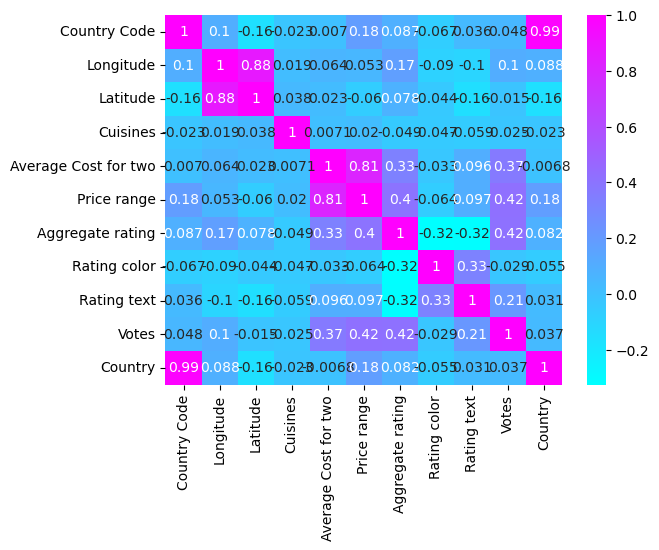

<Figure size 800x700 with 0 Axes>

In [74]:
corr_hmap = Zmt.corr()
sns.heatmap(corr_hmap,annot=True,cmap='cool')
plt.figure(figsize=(8,7))

# Count Plot

<function matplotlib.pyplot.show(close=None, block=None)>

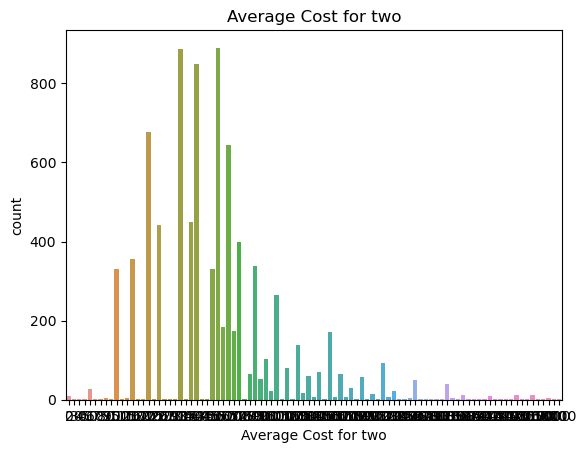

In [75]:
sns.countplot(x ='Average Cost for two', data = Zmt)
plt.title('Average Cost for two')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

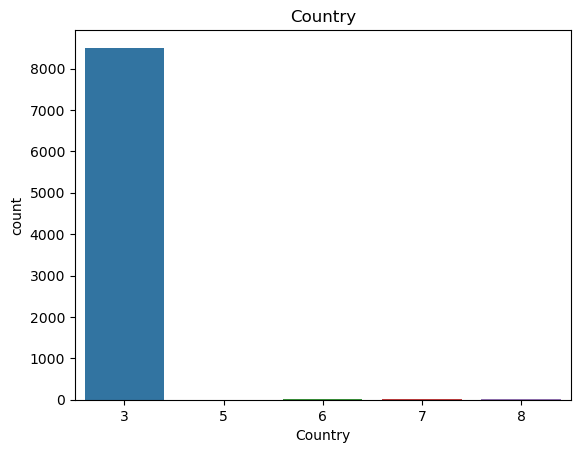

In [76]:
sns.countplot(x ='Country', data = Zmt)
plt.title('Country')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

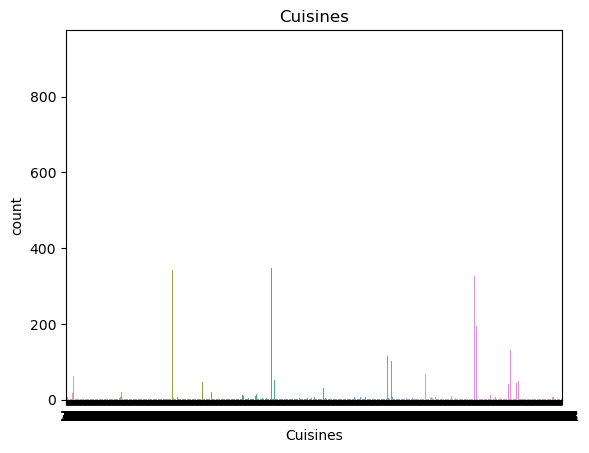

In [77]:
sns.countplot(x ='Cuisines', data = Zmt)
plt.title('Cuisines')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

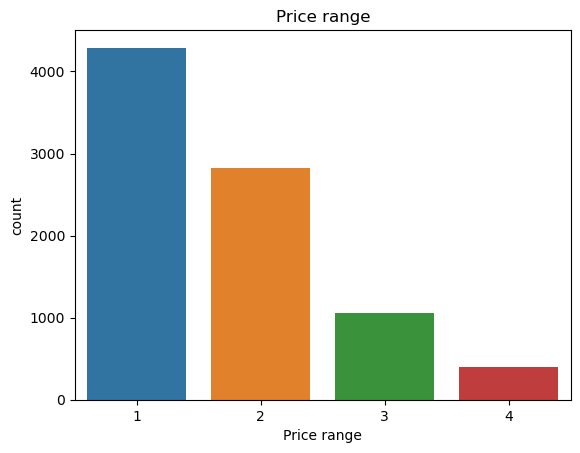

In [79]:
sns.countplot(x ='Price range', data = Zmt)
plt.title('Price range')
plt.show

# Dist Plot

<function matplotlib.pyplot.show(close=None, block=None)>

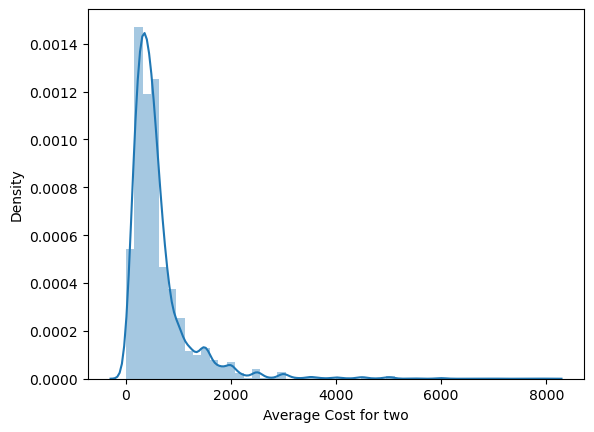

In [80]:
   sns.distplot(Zmt['Average Cost for two'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

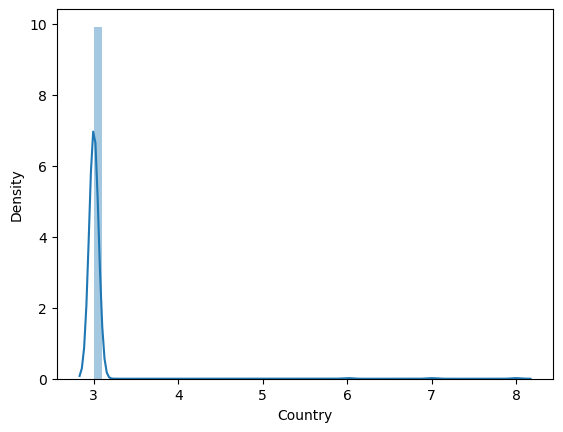

In [81]:
   sns.distplot(Zmt['Country'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

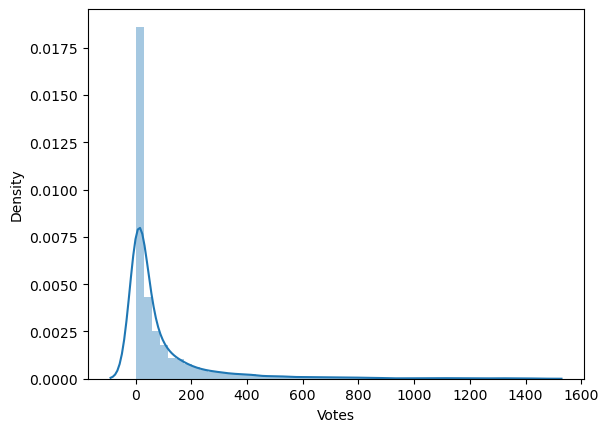

In [82]:
   sns.distplot(Zmt['Votes'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

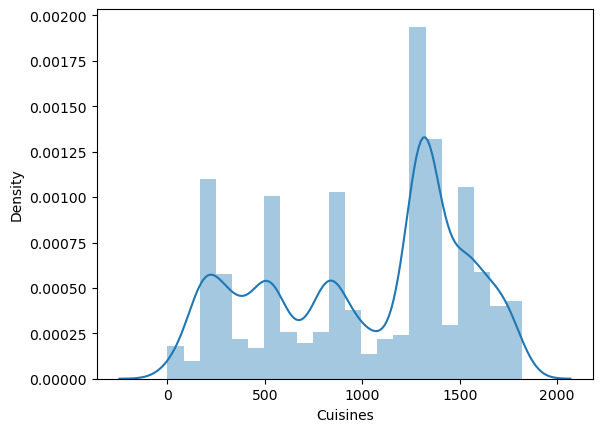

In [83]:
   sns.distplot(Zmt['Cuisines'])
plt.show

# Bar Plot

<Axes: xlabel='Average Cost for two', ylabel='Cuisines'>

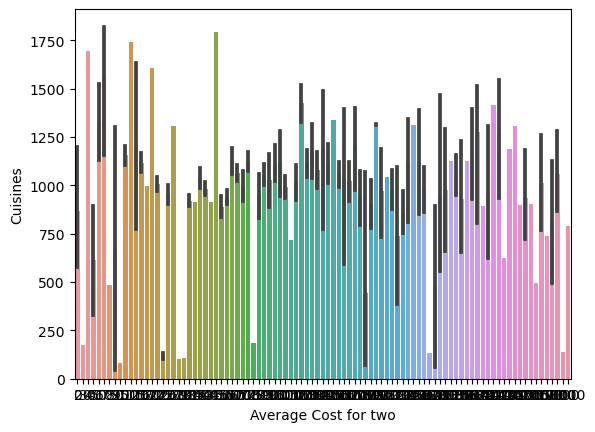

In [84]:

sns.barplot(x='Average Cost for two',y='Cuisines',data=Zmt)

<Axes: xlabel='Price range', ylabel='Cuisines'>

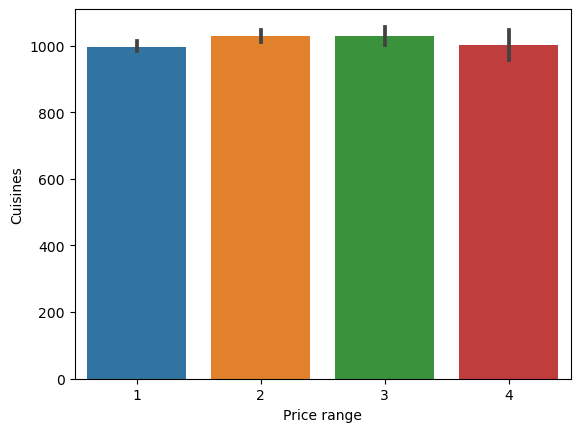

In [85]:

sns.barplot(x='Price range',y='Cuisines',data=Zmt)

<Axes: xlabel='Average Cost for two', ylabel='Cuisines'>

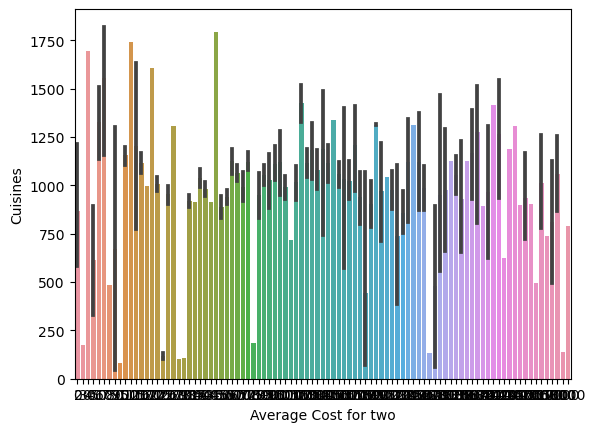

In [86]:

sns.barplot(x='Average Cost for two',y='Cuisines',data=Zmt)

# Box Plot

Country Code               Axes(0.125,0.747241;0.133621x0.132759)
Longitude               Axes(0.285345,0.747241;0.133621x0.132759)
Latitude                 Axes(0.44569,0.747241;0.133621x0.132759)
Cuisines                Axes(0.606034,0.747241;0.133621x0.132759)
Average Cost for two    Axes(0.766379,0.747241;0.133621x0.132759)
Price range                Axes(0.125,0.587931;0.133621x0.132759)
Aggregate rating        Axes(0.285345,0.587931;0.133621x0.132759)
Rating color             Axes(0.44569,0.587931;0.133621x0.132759)
Rating text             Axes(0.606034,0.587931;0.133621x0.132759)
Votes                   Axes(0.766379,0.587931;0.133621x0.132759)
Country                    Axes(0.125,0.428621;0.133621x0.132759)
dtype: object

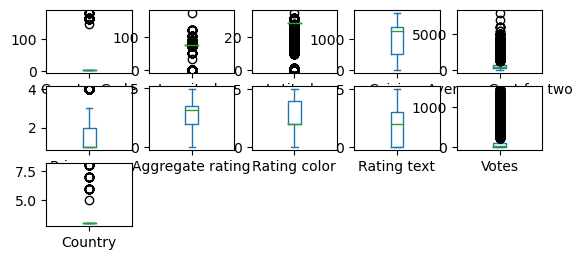

In [87]:
Zmt.plot(kind='box',subplots=True,layout=(5,5))

# Histogram

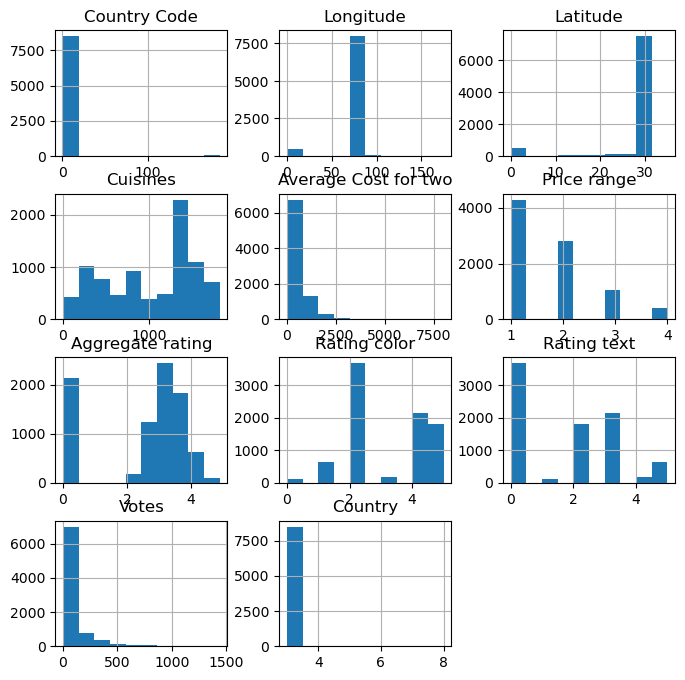

In [88]:
Zmt.hist(figsize=(8,8),bins=10)
plt.show()

# Scatter Plot

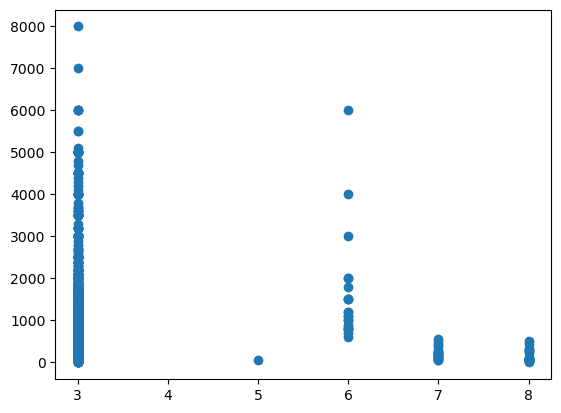

In [89]:
plt.scatter(Zmt['Country'],Zmt['Average Cost for two'])
plt.show()

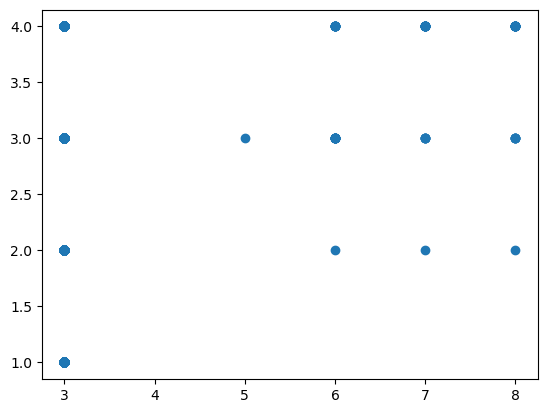

In [91]:
plt.scatter(Zmt['Country'],Zmt['Price range'])
plt.show()

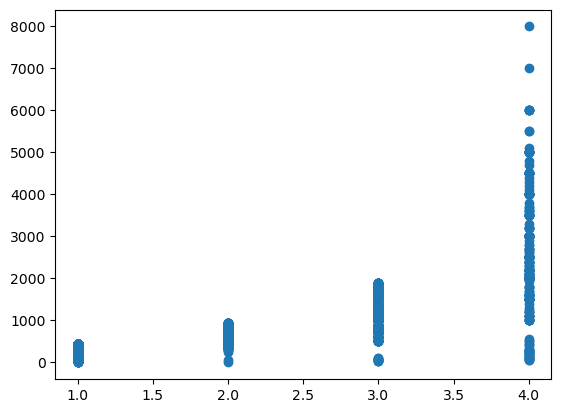

In [92]:
plt.scatter(Zmt['Price range'],Zmt['Average Cost for two'])
plt.show()

# Cat Plot

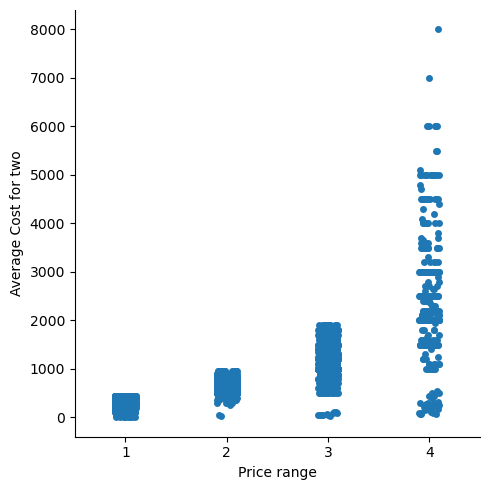

In [94]:
sns.catplot(x='Price range',y='Average Cost for two',data=Zmt)

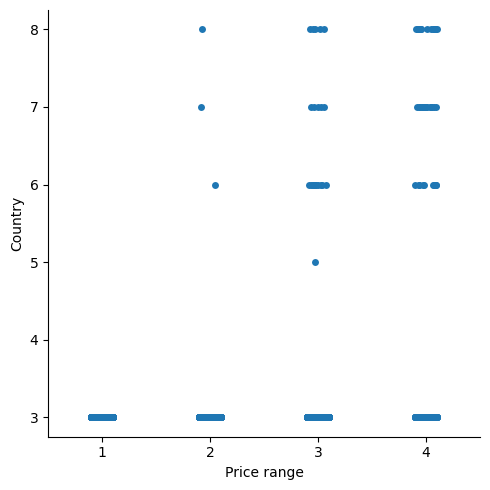

In [95]:
sns.catplot(x='Price range',y='Country',data=Zmt)

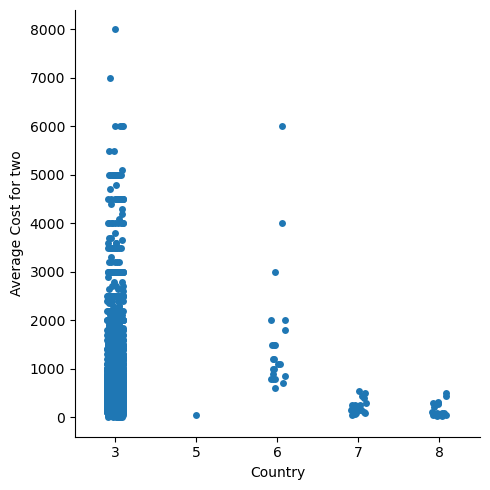

In [96]:
sns.catplot(x='Country',y='Average Cost for two',data=Zmt)

# Pair Plot

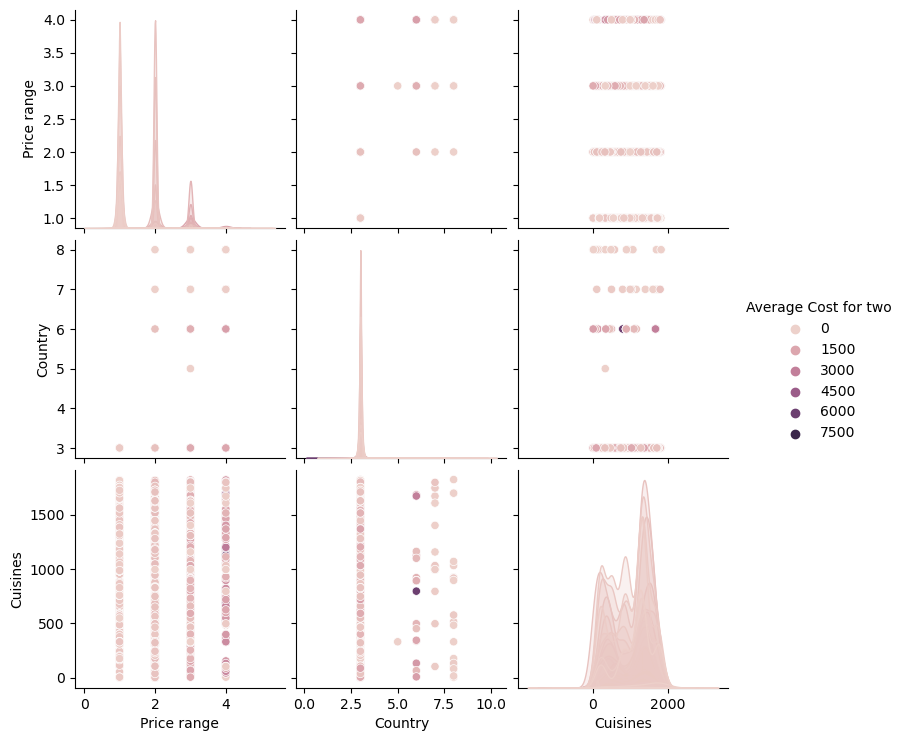

In [97]:
sns.pairplot(data=Zmt,hue='Average Cost for two',vars=['Price range','Country','Cuisines'])

# Joint Plot

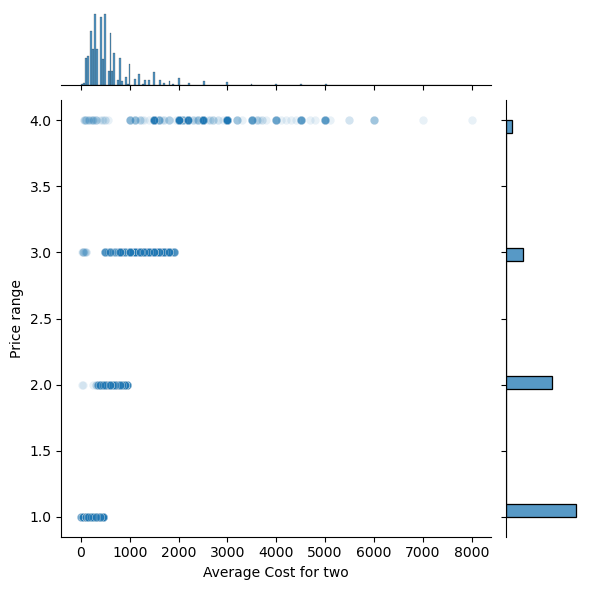

In [98]:
from scipy.stats import pearsonr
sns.jointplot(x='Average Cost for two', y='Price range', data=Zmt, alpha=0.1)

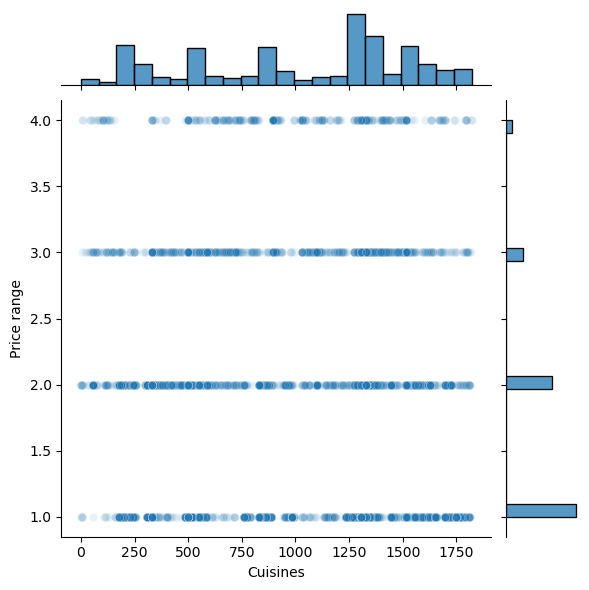

In [99]:

sns.jointplot(x='Cuisines', y='Price range', data=Zmt, alpha=0.1)

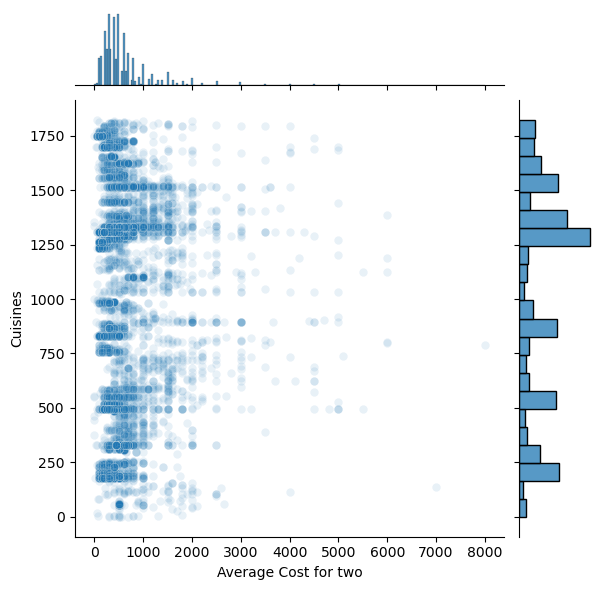

In [100]:

sns.jointplot(x='Average Cost for two', y='Cuisines', data=Zmt, alpha=0.1)

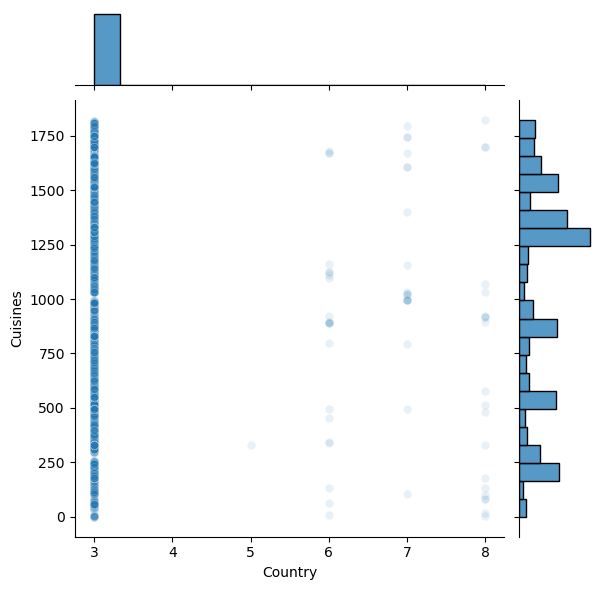

In [101]:

sns.jointplot(x='Country', y='Cuisines', data=Zmt, alpha=0.1)

# Training The Data

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=35)

In [103]:
x_train.shape

(5995, 10)

In [104]:
y_train.shape

(5995,)

In [105]:
x_test.shape

(2570, 10)

In [106]:
y_test.shape

(2570,)

# Fitting the models

In [108]:
lm=LinearRegression()

In [109]:
lm.fit(x_train,y_train)

LinearRegression()

In [110]:
lm.coef_

array([ 1.98864661e+01, -3.11388171e+00,  1.17044345e+01, -2.11482751e-02,
        5.77199520e+02,  3.54691522e+00,  3.58188369e+00,  8.40371443e+00,
        8.87473900e-02, -1.02616516e+03])

In [111]:
lm.intercept_

2583.008736068563

In [112]:
lm.score(x_train,y_train)

0.6947781678139549

In [113]:
#predict the value
pred=lm.predict(x_test)
print("Predicted result:",pred)
print("actual result:",y_test)

Predicted result: [ 765.90200392  187.66750188  776.32938131 ...  777.8076221   224.52646961
 1385.46160294]
actual result: 6645     600
3202     450
6450     700
2987     300
2479     550
        ... 
8385     700
3278     600
883      700
5290     200
3683    1250
Name: Average Cost for two, Length: 2570, dtype: int64


In [114]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 183.32909321064108
Mean squared error: 99008.48907779947
Root mean squared error: 314.6561441920362


In [115]:
knn=KNeighborsRegressor()

In [116]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [117]:
predknn=knn.predict(x_test)

In [118]:
knn.score(x_train,y_train)

0.5189074102528737

In [119]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predknn))
print('Mean squared error:',mean_squared_error(y_test,predknn))
print('r2 score',(r2_score(y_test,predknn)))

error:
Mean absolute error: 249.97120622568093
Mean squared error: 233524.68949416344
r2 score 0.2900221005500586


In [120]:
svm=SVR()

In [121]:
svm.fit(x_train,y_train)

SVR()

In [122]:
predsvm=svm.predict(x_test)

In [123]:
svm.score(x_train,y_train)

-0.006045857376750341

In [124]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predsvm))
print('Mean squared error:',mean_squared_error(y_test,predsvm))
print('r2 score',(r2_score(y_test,predsvm)))

error:
Mean absolute error: 308.83341453089713
Mean squared error: 331837.0401353058
r2 score -0.008873902049824522


In [125]:
dtc=DecisionTreeRegressor()

In [126]:
dtc.fit(x_train,y_train)

DecisionTreeRegressor()

In [127]:
preddtc=dtc.predict(x_test)

In [128]:
dtc.score(x_train,y_train)

0.9996797152083371

In [129]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,preddtc))
print('Mean squared error:',mean_squared_error(y_test,preddtc))
print('r2 score',(r2_score(y_test,preddtc)))

error:
Mean absolute error: 150.79312581063553
Mean squared error: 95101.19939652065
r2 score 0.7108667613306073


In [130]:
rfc=RandomForestRegressor()

In [131]:
rfc.fit(x_train,y_train)

RandomForestRegressor()

In [132]:
predrfc=rfc.predict(x_test)

In [133]:
rfc.score(x_train,y_train)

0.9784628670232933

In [134]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predrfc))
print('Mean squared error:',mean_squared_error(y_test,predrfc))
print('r2 score',(r2_score(y_test,predrfc)))

error:
Mean absolute error: 118.33790817620019
Mean squared error: 48335.29249070044
r2 score 0.8530477034090919


In [135]:

# Fit Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

Lasso(alpha=0.1)

In [139]:
#testing the model
predl=lasso.predict(x_test)

In [140]:
lasso.score(x_train,y_train)

0.6947669602813653

In [141]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predl))
print('Mean squared error:',mean_squared_error(y_test,predl))
print('r2 score',(r2_score(y_test,predl)))

error:
Mean absolute error: 183.15358223845618
Mean squared error: 98951.36128004138
r2 score 0.6991612330949191


In [142]:

# Fit Ridge regression model
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)

Ridge(alpha=0.1)

In [143]:
#testing the model
predr=ridge.predict(x_test)

In [144]:
ridge.score(x_train,y_train)

0.6947778624768395

In [145]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predr))
print('Mean squared error:',mean_squared_error(y_test,predr))
print('r2 score',(r2_score(y_test,predr)))

error:
Mean absolute error: 183.3034641420471
Mean squared error: 98998.33564780357
r2 score 0.6990184183757386


# Cross Validation Score

In [146]:
#for comparing the score of different models
from sklearn.model_selection import KFold, cross_val_score
k_folds=KFold(n_splits=5)
score=cross_val_score(lm,x_train,y_train,cv=k_folds)

In [147]:
print('The Best score for Linear Model is',score.mean())

The Best score for Linear Model is 0.694236094941844


In [148]:
k_folds=KFold(n_splits=5)
score=cross_val_score(dtc,x_train,y_train,cv=k_folds)

In [149]:

print('The Best score for Decision Tree Regressor is',score.mean())

The Best score for Decision Tree Regressor is 0.737096188446916


In [150]:
k_folds=KFold(n_splits=5)
score=cross_val_score(rfc,x_train,y_train,cv=k_folds)

In [151]:

print('The Best score for Random Forest Regressor is',score.mean())

The Best score for Random Forest Regressor is 0.8408567154670926


In [152]:
k_folds=KFold(n_splits=5)
score=cross_val_score(svm,x_train,y_train,cv=k_folds)


In [154]:
print('The Best score for SVR is',score.mean())

The Best score for SVR is 0.6942289277244835


In [155]:
k_folds=KFold(n_splits=5)
score=cross_val_score(knn,x_train,y_train,cv=k_folds)



In [156]:
print('The Best score for K Neighbour Regressor is',score.mean())

The Best score for K Neighbour Regressor is 0.2624920177412989


In [157]:
k_folds=KFold(n_splits=5)
score=cross_val_score(lasso,x_train,y_train,cv=k_folds)


In [158]:
print('The Best score for Lasso is',score.mean())

The Best score for Lasso is 0.6942289277244835


In [159]:
k_folds=KFold(n_splits=5)
score=cross_val_score(ridge,x_train,y_train,cv=k_folds)

In [160]:
print('The Best score for Ridge is',score.mean())

The Best score for Ridge is 0.6942408852935584


# Hyper parameter Tuning The Best Model

In [161]:
#estimating the parameters
param_grid={'n_estimators':[90,30],'max_features':['auto','sqrt'],'min_samples_split':[17,6],'min_samples_leaf':[7,9],'bootstrap':[True,False]}
           

In [162]:
from sklearn.model_selection import RandomizedSearchCV
rfc_random=RandomizedSearchCV(estimator=rfc,param_distributions=param_grid,n_iter=20,verbose=6,cv=5,random_state=35,n_jobs=0.1)

In [163]:
rfc_cv=RandomizedSearchCV(RandomForestRegressor(),param_grid,cv=5)
rfc_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [7, 9],
                                        'min_samples_split': [17, 6],
                                        'n_estimators': [90, 30]})

In [164]:
print('Best Parameters',rfc_cv.best_params_)
print('Best Score',rfc_cv.best_score_)

Best Parameters {'n_estimators': 90, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': 'auto', 'bootstrap': True}
Best Score 0.8458778973018651


In [165]:
r_fit=RandomForestRegressor(n_estimators= 90, min_samples_split= 6, min_samples_leaf= 9, max_features='auto', bootstrap=True)

In [166]:
r_fit.fit(x_train,y_train)

RandomForestRegressor(max_features='auto', min_samples_leaf=9,
                      min_samples_split=6, n_estimators=90)

In [167]:
df=pd.DataFrame({'Actual Data':y_test,'predicted Data':r_fit.predict(x_test)})

In [168]:
df

,Actual Data,predicted Data
6645,600,656.504773
3202,450,275.858220
6450,700,676.200604
2987,300,357.137960
2479,550,678.598734
...,...,...
8385,700,618.558567
3278,600,672.889923
883,700,632.038892
5290,200,263.140852


In [169]:
x=Zmt.drop(columns=['Price range'],axis=1)
print(x)

      Country Code   Longitude   Latitude  Cuisines  Average Cost for two  \
0              162  121.027535  14.565443       920                  1100   
1              162  121.014101  14.553708      1111                  1200   
2              162  121.056831  14.581404      1671                  4000   
3              162  121.056475  14.585318      1126                  1500   
4              162  121.057508  14.584450      1122                  1500   
...            ...         ...        ...       ...                   ...   
9432           166   51.526653  25.323261       794                   200   
9433           166   51.530127  25.350325      1022                   550   
9434           166   51.512909  25.276180      1795                   445   
9435           166   51.544576  25.273020      1031                   400   
9436           166   51.546714  25.283011       995                   160   

      Aggregate rating  Rating color  Rating text  Votes  Country  
0      

In [171]:
y=Zmt['Price range']
print(y)

0       3
1       3
2       4
3       4
4       4
       ..
9432    4
9433    4
9434    4
9435    4
9436    4
Name: Price range, Length: 8565, dtype: int64


# Training the Data

In [227]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=32)

In [173]:
x_train.shape

(5995, 10)

In [174]:
y_train.shape

(5995,)

In [175]:
x_test.shape

(2570, 10)

In [176]:
y_test.shape

(2570,)

# Fitting The Model

In [177]:
lm=LinearRegression()

In [178]:
lm.fit(x_train,y_train)

LinearRegression()

In [179]:
lm.coef_

array([-1.55139853e-02,  3.46357896e-03, -1.41614980e-02,  5.24375511e-05,
        1.09261949e-03,  7.46390919e-02,  2.58956413e-03,  2.00808275e-02,
        3.02418303e-04,  1.03816605e+00])

In [180]:
lm.intercept_

-2.248817938094195

In [181]:
lm.score(x_train,y_train)

0.7364962243241073

In [182]:

pred=lm.predict(x_test)

In [183]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 0.3393317257073359
Mean squared error: 0.20352009826583076
Root mean squared error: 0.45113201866618907


In [184]:
knn=KNeighborsRegressor()

In [185]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [186]:
predknn=knn.predict(x_test)

In [187]:
knn.score(x_train,y_train)

0.963398850574193

In [188]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predknn))
print('Mean squared error:',mean_squared_error(y_test,predknn))
print('r2 score',(r2_score(y_test,predknn)))

error:
Mean absolute error: 0.058365758754863814
Mean squared error: 0.03863035019455253
r2 score 0.9449549153838255


In [189]:
svm=SVR()

In [190]:
svm.fit(x_train,y_train)

SVR()

In [191]:
predsvm=svm.predict(x_test)

In [192]:
svm.score(x_train,y_train)

0.8664311973955747

In [194]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predsvm))
print('Mean squared error:',mean_squared_error(y_test,predsvm))
print('r2 score',(r2_score(y_test,predsvm)))

error:
Mean absolute error: 0.21218562728885673
Mean squared error: 0.0845655042457418
r2 score 0.8795010836460722


In [195]:
dtc=DecisionTreeRegressor()

In [196]:
dtc.fit(x_train,y_train)

DecisionTreeRegressor()

In [197]:
preddtc=dtc.predict(x_test)

In [198]:
dtc.score(x_train,y_train)

1.0

In [199]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,preddtc))
print('Mean squared error:',mean_squared_error(y_test,preddtc))
print('r2 score',(r2_score(y_test,preddtc)))

error:
Mean absolute error: 0.015175097276264591
Mean squared error: 0.015175097276264591
r2 score 0.9783767294517445


In [200]:
rfc=RandomForestRegressor()

In [201]:
rfc.fit(x_train,y_train)

RandomForestRegressor()

In [202]:
predrfc=rfc.predict(x_test)

In [203]:
rfc.score(x_train,y_train)

0.9978890205772925

In [204]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predrfc))
print('Mean squared error:',mean_squared_error(y_test,predrfc))
print('r2 score',(r2_score(y_test,predrfc)))

error:
Mean absolute error: 0.02086770428015564
Mean squared error: 0.009801050583657586
r2 score 0.9860343057728501


In [205]:

# Fit Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

Lasso(alpha=0.1)

In [206]:
#testing the model
pred=lasso.predict(x_test)

In [207]:
lasso.score(x_train,y_train)

0.7215630802726851

In [208]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predl))
print('Mean squared error:',mean_squared_error(y_test,predl))
print('r2 score',(r2_score(y_test,predl)))

error:
Mean absolute error: 607.4423980178992
Mean squared error: 609292.1745929084
r2 score -868190.4385329358


In [209]:

# Fit Ridge regression model
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)

Ridge(alpha=0.1)

In [210]:
#testing the model
predr=ridge.predict(x_test)

In [211]:
ridge.score(x_train,y_train)

0.7364961077730406

In [212]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predr))
print('Mean squared error:',mean_squared_error(y_test,predr))
print('r2 score',(r2_score(y_test,predr)))

error:
Mean absolute error: 0.33933804828915665
Mean squared error: 0.20353944468674673
r2 score 0.7099729642862243


# Cross Validation

In [213]:
#for comparing the score of different models
from sklearn.model_selection import KFold, cross_val_score
k_folds=KFold(n_splits=5)
score=cross_val_score(lm,x_train,y_train,cv=k_folds)

In [214]:
print('The Best score for Linear Model is',score.mean())

The Best score for Linear Model is 0.7330038962353586


In [215]:
k_folds=KFold(n_splits=5)
score=cross_val_score(knn,x_train,y_train,cv=k_folds)

In [216]:
print('The Best score for KNN is',score.mean())

The Best score for KNN is 0.9325314880023466


In [217]:
k_folds=KFold(n_splits=5)
score=cross_val_score(svm,x_train,y_train,cv=k_folds)

In [218]:
print('The Best score for SVR is',score.mean())

The Best score for SVR is 0.8601195212850186


In [219]:
k_folds=KFold(n_splits=5)
score=cross_val_score(dtc,x_train,y_train,cv=k_folds)

In [220]:
print('The Best score for DEcision Tree Regressor is',score.mean())

The Best score for DEcision Tree Regressor is 0.9707779739999294


In [221]:
k_folds=KFold(n_splits=5)
score=cross_val_score(rfc,x_train,y_train,cv=k_folds)

In [222]:
print('The Best score for Random Forest Regressor is',score.mean())

The Best score for Random Forest Regressor is 0.9830096332278886


In [223]:
k_folds=KFold(n_splits=5)
score=cross_val_score(lasso,x_train,y_train,cv=k_folds)

In [224]:
print('The Best score for lasso is',score.mean())

The Best score for lasso is 0.7186997700434661


In [225]:
k_folds=KFold(n_splits=5)
score=cross_val_score(ridge,x_train,y_train,cv=k_folds)

In [226]:
print('The Best score for ridge is',score.mean())

The Best score for ridge is 0.7330096103373371


# Hyper parameter Tuning The Best Model

In [228]:
#estimating the parameters
param_grid={'n_estimators':[90,30],'max_features':['auto','sqrt'],'min_samples_split':[9,6],'min_samples_leaf':[7,9],'bootstrap':[True,False]}
           

In [229]:
from sklearn.model_selection import RandomizedSearchCV
rfc_random=RandomizedSearchCV(estimator=rfc,param_distributions=param_grid,n_iter=50,verbose=1,cv=5,random_state=42,n_jobs=2)

In [230]:
rfc_cv=RandomizedSearchCV(RandomForestRegressor(),param_grid,cv=5)
rfc_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [7, 9],
                                        'min_samples_split': [9, 6],
                                        'n_estimators': [90, 30]})

In [231]:
print('Best Parameters',rfc_cv.best_params_)
print('Best Score',rfc_cv.best_score_)

Best Parameters {'n_estimators': 90, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': 'auto', 'bootstrap': True}
Best Score 0.977573931107562


In [232]:
r_fit=RandomForestRegressor(n_estimators= 90, min_samples_split= 6, min_samples_leaf= 9, max_features='auto', bootstrap=True)

In [233]:
r_fit.fit(x_train,y_train)

RandomForestRegressor(max_features='auto', min_samples_leaf=9,
                      min_samples_split=6, n_estimators=90)

In [234]:
df=pd.DataFrame({'Actual Data':y_test,'predicted Data':r_fit.predict(x_test)})

In [235]:
df

,Actual Data,predicted Data
8752,2,2.000000
9199,3,2.942972
7900,2,2.000000
4249,2,2.000000
8761,1,1.000000
...,...,...
9269,2,2.292254
6097,1,1.000000
8521,1,1.131923
8276,2,2.000000


In [ ]:
#Random Forest Regressor is the selected model selected according to the cross validation scores

# Saving The Best Model

In [237]:
import pickle

In [238]:
saved_model=pickle.dumps(rfc)

In [239]:
rfc_from_pickle=pickle.loads(saved_model)

In [240]:
rfc_from_pickle.predict(x_test)

array([2.  , 3.  , 2.  , ..., 1.13, 2.  , 2.  ])